# Movie Rating Predictions

Importing The Dependancies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

Importing The Datasets into a Pandas Datafram

In [ ]:
df_user = pd.read_csv("/content/users.dat",sep='::',engine='python', header=None)
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [ ]:
## Checking for Null Values
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [ ]:
#download datasets from https://www.kaggle.com/code/sherinclaudia/movie-rating-prediction/notebook
df_movie = pd.read_csv('/content/movies.dat', sep = '::', engine='python', encoding='latin1', header=None)
df_movie.columns = ['MovieID','MovieName','Category']
df_movie.head(10)

,MovieID,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
## Checking for Null Values
df_movie.isnull().sum()

MovieID      0
MovieName    0
Category     0
dtype: int64

In [ ]:
df_rating = pd.read_csv("/content/ratings.dat",sep='::', engine='python', header=None)
df_rating.columns =['UserID','MovieID','Ratings','TimeStamp']
df_rating.head(10)

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [ ]:
## Checking for Null Values
df_rating.isnull().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

Concatinating The 3 datasets

In [ ]:
df_movie_rating = pd.merge(df_movie, df_rating, on='MovieID')
df_movie_rating.head(10)

,MovieID,MovieName,Category,UserID,Ratings,TimeStamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703


In [ ]:
df = pd.merge(df_user, df_movie_rating, on='UserID')
df.head(25)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,MovieName,Category,Ratings,TimeStamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195
5,1,F,1,10,48067,531,"Secret Garden, The (1993)",Children's|Drama,4,978302149
6,1,F,1,10,48067,588,Aladdin (1992),Animation|Children's|Comedy|Musical,4,978824268
7,1,F,1,10,48067,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,4,978302268
8,1,F,1,10,48067,595,Beauty and the Beast (1991),Animation|Children's|Musical,5,978824268
9,1,F,1,10,48067,608,Fargo (1996),Crime|Drama|Thriller,4,978301398


#Performing EDA on the Dataset

<Axes: xlabel='Age', ylabel='count'>

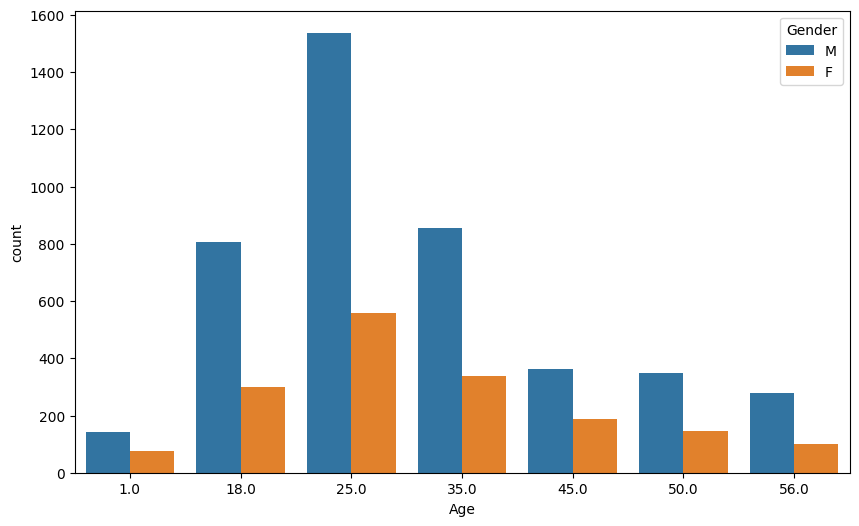

In [ ]:
#Visualize user age and gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Age', hue='Gender')

Most people that are rating the movies are between 18 and 35

Male Ratings are significantly larger than female rating

<Axes: xlabel='Ratings', ylabel='count'>

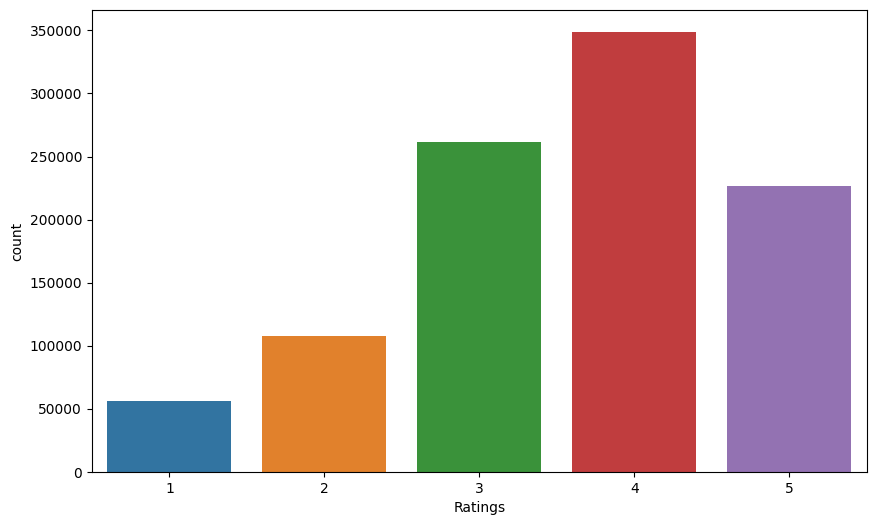

In [ ]:
# Visualizing the ratings given by the users
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Ratings')

Most Ratings given are 3, 4 and 5 with 4 being the most relevant result

## Getting the Features and labels ready for training

First Finding the label Encoding the Gender

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,MovieName,Category,Ratings,TimeStamp
0,1,0,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,0,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,0,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,0,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,0,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


Finding The Dummy Variables for The Categories

In [ ]:
categories_dummies = df['Category'].str.get_dummies()
df = pd.concat([df, categories_dummies], axis=1)
df.drop('Category', axis=1, inplace=True)
df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,MovieName,Ratings,TimeStamp,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,10,48067,1,Toy Story (1995),5,978824268,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,10,48067,48,Pocahontas (1995),5,978824351,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,0,1,10,48067,150,Apollo 13 (1995),5,978301777,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),4,978300760,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,1,10,48067,527,Schindler's List (1993),5,978824195,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1000209 non-null  int64 
 1   Gender       1000209 non-null  int64 
 2   Age          1000209 non-null  int64 
 3   Occupation   1000209 non-null  int64 
 4   Zip-code     1000209 non-null  object
 5   MovieID      1000209 non-null  int64 
 6   MovieName    1000209 non-null  object
 7   Ratings      1000209 non-null  int64 
 8   TimeStamp    1000209 non-null  int64 
 9   Action       1000209 non-null  int64 
 10  Adventure    1000209 non-null  int64 
 11  Animation    1000209 non-null  int64 
 12  Children's   1000209 non-null  int64 
 13  Comedy       1000209 non-null  int64 
 14  Crime        1000209 non-null  int64 
 15  Documentary  1000209 non-null  int64 
 16  Drama        1000209 non-null  int64 
 17  Fantasy      1000209 non-null  int64 
 18  Film-Noir    1000209 n

dropping Unwanted Columns

In [ ]:
df = df.drop(['Zip-code', 'MovieName', 'UserID'], axis=1)
df.head()

,Gender,Age,Occupation,MovieID,Ratings,TimeStamp,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,10,1,5,978824268,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,10,48,5,978824351,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,1,10,150,5,978301777,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,10,260,4,978300760,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,1,10,527,5,978824195,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Importing the features and the labels

In [ ]:
X = df.drop(['Ratings', 'TimeStamp'], axis=1).values
y = df['Ratings'].values

In [ ]:
print(X)
print(y)

[[ 0  1 10 ...  0  0  0]
 [ 0  1 10 ...  0  0  0]
 [ 0  1 10 ...  0  0  0]
 ...
 [ 1 25  6 ...  0  0  0]
 [ 1 25  6 ...  0  0  0]
 [ 1 25  6 ...  0  0  0]]
[5 5 5 ... 4 4 5]


Splitting the data into train and test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Testing Different Model for Rating Prediction

Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'mean squared error loss: {mean_squared_error(model.predict(X_test), y_test)}')

mean squared error loss: 1.1999506030627367


Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(f'mean squared error loss: {mean_squared_error(dtr.predict(X_test), y_test)}')

mean squared error loss: 1.2777835555261179


Using Neural Networks

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression task

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
22505/22505 [==============================] - 45s 2ms/step - loss: 5.6191 - val_loss: 1.2339
Epoch 2/50
22505/22505 [==============================] - 41s 2ms/step - loss: 1.9283 - val_loss: 1.4636
Epoch 3/50
22505/22505 [==============================] - 41s 2ms/step - loss: 1.3965 - val_loss: 1.2051
Epoch 4/50
22505/22505 [==============================] - 43s 2ms/step - loss: 1.2254 - val_loss: 1.2334
Epoch 5/50
22505/22505 [==============================] - 42s 2ms/step - loss: 1.1943 - val_loss: 1.1760
Epoch 6/50
22505/22505 [==============================] - 43s 2ms/step - loss: 1.1825 - val_loss: 1.1674
Epoch 7/50
22505/22505 [==============================] - 44s 2ms/step - loss: 1.1748 - val_loss: 1.1656
Epoch 8/50
22505/22505 [==============================] - 44s 2ms/step - loss: 1.1716 - val_loss: 1.1683
Epoch 9/50
22505/22505 [==============================] - 41s 2ms/step - loss: 1.1803 - val_loss: 1.1618
Epoch 10/50
22505/22505 [==============================

In [ ]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict and round the outputs to the nearest integer within the range 1 to 5
predictions = model.predict(X_test)
rounded_predictions = np.round(np.clip(predictions, 1, 5))

print("Rounded Predictions:", rounded_predictions)


6252/6252 [==============================] - 10s 2ms/step - loss: 1.1559
Test Loss: 1.1558955907821655
6252/6252 [==============================] - 8s 1ms/step
Rounded Predictions: [[4.]
 [4.]
 [3.]
 ...
 [4.]
 [4.]
 [4.]]


Comparing First 30 predictions with True Values

In [ ]:
for i in range(30):
    print(f"True Rating: {y_test[i]}, Predicted Rating: {rounded_predictions[i]}")


True Rating: 5, Predicted Rating: [4.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [3.]
True Rating: 4, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [3.]
True Rating: 1, Predicted Rating: [4.]
True Rating: 5, Predicted Rating: [3.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [3.]
True Rating: 3, Predicted Rating: [3.]
True Rating: 2, Predicted Rating: [4.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 2, Predicted Rating: [3.]
True Rating: 2, Predicted Rating: [3.]
True Rating: 4, Predicted Rating: [4.]
True Rating: 3, Predicted Rating: [4.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 1, Predicted Rating: [3.]
True Rating: 3, Predicted Rating: [3.]
True Rating: 4, Predicted Rating: [4.]
True Rating: 4, Predicted Rating: [3.]
True Rating: 5, Predicted Rating: [4.]
True Rating: 3, Predicted